In [1]:
def LF(v,l1,l2):
    if(v<=l1):
        return 1
    if(v>l2):
        return 0
    return 1-(v-l1)/(l2-l1)




print(LF(-12000,-5000,-2000))
print(LF(-1000,-5000,-2000))
print(LF(-2200,-5000,-2000))

1
0
0.06666666666666665


In [2]:


ini_date = '12/08/22 13:00:00'
end_date = '13/08/22 17:00:00'

time_step=60


def filter0(v):
    return v

def agg0(vs):
    if(len(vs)==0):
        return 0
    return min(vs)


def LFpower(vs):
    if(len(vs)==0):
        return 0
    v=min(vs)
    return LF(v,-5000,-1000)
    

energy_sensors=["power", "reactive_power"]

filter_function={}
filter_function["power"]=filter0
filter_function["reactive_power"]=filter0
filter_function["pf"]=filter0

aggretation_function={}
aggretation_function["power"]=agg0
#aggretation_function["power"]=agg0
aggretation_function["reactive_power"]=agg0
aggretation_function["pf"]=agg0


In [3]:
import numpy as np
from pandas import read_csv    

import time

from datetime import datetime

def day_time(ti):
    return int((int)(ti/(60*60*24)))



t0 = (int)(datetime.strptime(ini_date, '%d/%m/%y %H:%M:%S').timestamp())
print ("Init date is", t0, "day:",day_time(t0))

tN = (int)(datetime.strptime(end_date, '%d/%m/%y %H:%M:%S').timestamp())
print ("Init date is", tN, "day:",day_time(tN))

def relT(ti):
    return (int)((ti-t0)/time_step)


Init date is 1660302000 day: 19216
Init date is 1660402800 day: 19217


In [4]:
import pandas as pd

df = pd.DataFrame()

ts=[]
for t in range(t0,tN,time_step):
    ts.append(datetime.fromtimestamp( t))

df['Time']=ts    
    

In [5]:

for sensor in energy_sensors:
    dt=[]
    for d in range(day_time(t0),day_time(tN)+1):
        print("Loading day ",d)
        try:
            series=read_csv("./data/energy/"+str(d)+"."+sensor+".tsv", sep="\t",parse_dates=True,header=None)
            for vt in series.values[:,[0,2]]:
                t=relT(vt[0])
                v=filter_function[sensor](vt[1])
                dt.append([t,v])
                
        except:
            print(" Not data for sensor ",sensor, " in day ",d)
    dt=np.array(dt)
    print(dt.shape)
    print(dt)
    ts=dt[:,0]
    
    f = open("./time-data/"+sensor+".tsv", "w")
    vs=[]
    for t in range(t0,tN,time_step):
        ti=relT(t)
        i=np.where( (ts==ti))[0]
        #print(i, " dt[i]:",dt[:,1][i])
        v_agg=aggretation_function[sensor](dt[:,1][i])
        
        #print(ti," agg:",v_agg)
        vs.append(v_agg)
        f.write(str(ti)+"\t"+str(v_agg)+"\t"+datetime.fromtimestamp( t).strftime("%Y-%m-%d %H:%M:%S")+"\n")
        
    f.close()
    df[sensor]=vs


        

Loading day  19216
Loading day  19217
(9088, 2)
[[  52.   -209.26]
 [  52.   -238.94]
 [  52.   -246.8 ]
 ...
 [1616.   -262.95]
 [1616.   -268.92]
 [1616.   -277.79]]
Loading day  19216
Loading day  19217
(9088, 2)
[[  52.    -79.87]
 [  52.    -85.7 ]
 [  52.    -55.85]
 ...
 [1616.   -128.9 ]
 [1616.   -134.59]
 [1616.   -144.32]]


array([<AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>],
      dtype=object)

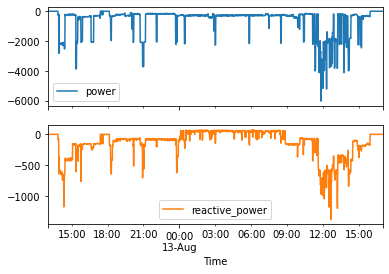

In [6]:
df.plot(x="Time",y=energy_sensors,subplots=True, legend=True)
